## Assignment 2: Discision Boundary of Linier Regression

In the lab we saw the implementation of the logistic regression from a small sample dataset cosisting of 6 data. And our task was to load the data.txt and generate discison boundary among 2 classes of data. 

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import arange, hstack, meshgrid

In lab we ran the code using following data sample

In [41]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
print(X_train)
y_train = np.array([0, 0, 0, 1, 1, 1])
print(y_train)

# TO DO : Import training data from data.txt

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
[0 0 0 1 1 1]


### Now I will import and Extract Data from the *data.txt*

In [42]:
# Importing from data.txt
with open('data.txt', 'r', encoding='utf-8-sig') as file:
    lines = file.readlines()


data = []

# Parsing the data from each line
for line in lines:    
    values = line.strip().split(',')        
    values = [float(val) if i != 2 else int(val) for i, val in enumerate(values)]        
    data.append(values)


# Converting to NumPy array
X_train = np.array(data)

# As data.txt is in "82.30705337399482,76.48196330235604,1" form
y_train = X_train[:, -1] # Extracting Y
X_train = X_train[:, :-1] # Extracting X

### Plotting the extracted data in a scatter plot

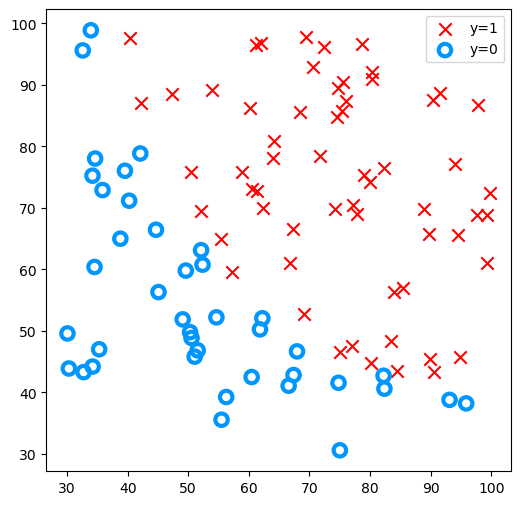

In [80]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(6,6))

pos = y_train == 1
neg = y_train == 0

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

## Training model using ScikitLearn

Now I am using scikit learn library and training the model. After training I am also calculating the accuracy.

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the predictions
predictions = model.predict(X_train)
acc = accuracy_score(y_train, predictions)
print('Accuracy of the model is: ',  np.round(acc * 100), '%')

Accuracy of the model is:  89.0 %


### Genarating Discision boundary

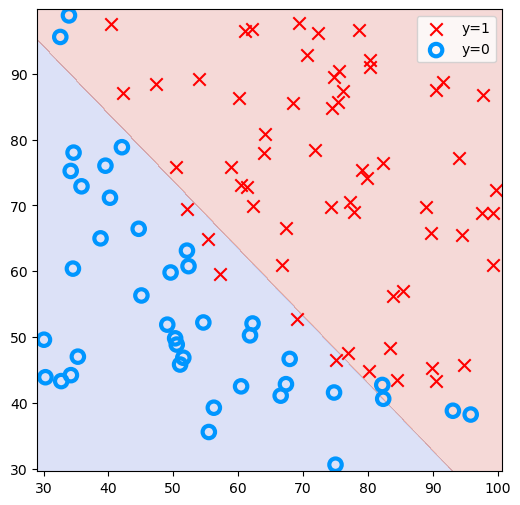

In [79]:
# defining the range of X
min1, max1 = X_train[:, 0].min()-1, X_train[:, 0].max()+1
min2, max2 = X_train[:, 1].min()-1, X_train[:, 1].max()+1

# defining the scale
scale_x1 = arange(min1, max1, 0.1)
scale_x2 = arange(min2, max2, 0.1)

# creating all of the lines and rows of the grid
line_x, line_y = meshgrid(scale_x1, scale_x2)

# flatten each grid to a vector
v1, v2 = line_x.flatten(), line_y.flatten()
v1, v2 = v1.reshape((len(v1), 1)), v2.reshape((len(v2), 1))

# horizontal stack vectors to create x1,x2 input for the model
inputs = hstack((v1,v2))

# make predictions for the inputs
predictions = model.predict(inputs)

# reshape the predictions back into a grid
line_z = predictions.reshape(line_x.shape)

pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(6,6))

# plot the grid of x, y and z values as a surface
plt.contourf(line_x, line_y, line_z, cmap='coolwarm', alpha=0.2)

pos = y_train == 1
neg = y_train == 0

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False